In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
lb=LabelEncoder()
MMS=MinMaxScaler()
sc=StandardScaler()

In [3]:
my_df=pd.read_csv('diabetes_prediction_dataset.csv')

X=my_df.iloc[:,0:8]


X=X.dropna()

print(type(X))

Y=my_df.iloc[:,-1]

Y 

<class 'pandas.core.frame.DataFrame'>


0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [4]:
# labelencoding 

X['gender']=lb.fit_transform(X['gender'])

X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,never,25.19,6.6,140
1,0,54.0,0,0,No Info,27.32,6.6,80
2,1,28.0,0,0,never,27.32,5.7,158
3,0,36.0,0,0,current,23.45,5.0,155
4,1,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90
99996,0,2.0,0,0,No Info,17.37,6.5,100
99997,1,66.0,0,0,former,27.83,5.7,155
99998,0,24.0,0,0,never,35.42,4.0,100


In [4]:
# OneHotEncoding

feature_cols = ['smoking_history']

encoder = OneHotEncoder()

X_encoded = pd.DataFrame(encoder.fit_transform(X[feature_cols]).toarray(),
                          columns=encoder.get_feature_names(feature_cols))

X = pd.concat([X.drop(feature_cols, axis=1), X_encoded], axis=1)

X.shape

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

  warnings.warn(msg, category=FutureWarning)


(100000, 13)

In [5]:
# Normaliztion 

num_cols = ['age', 'bmi', 'HbA1c_level','blood_glucose_level']
X[num_cols] = sc.fit_transform(X[num_cols])

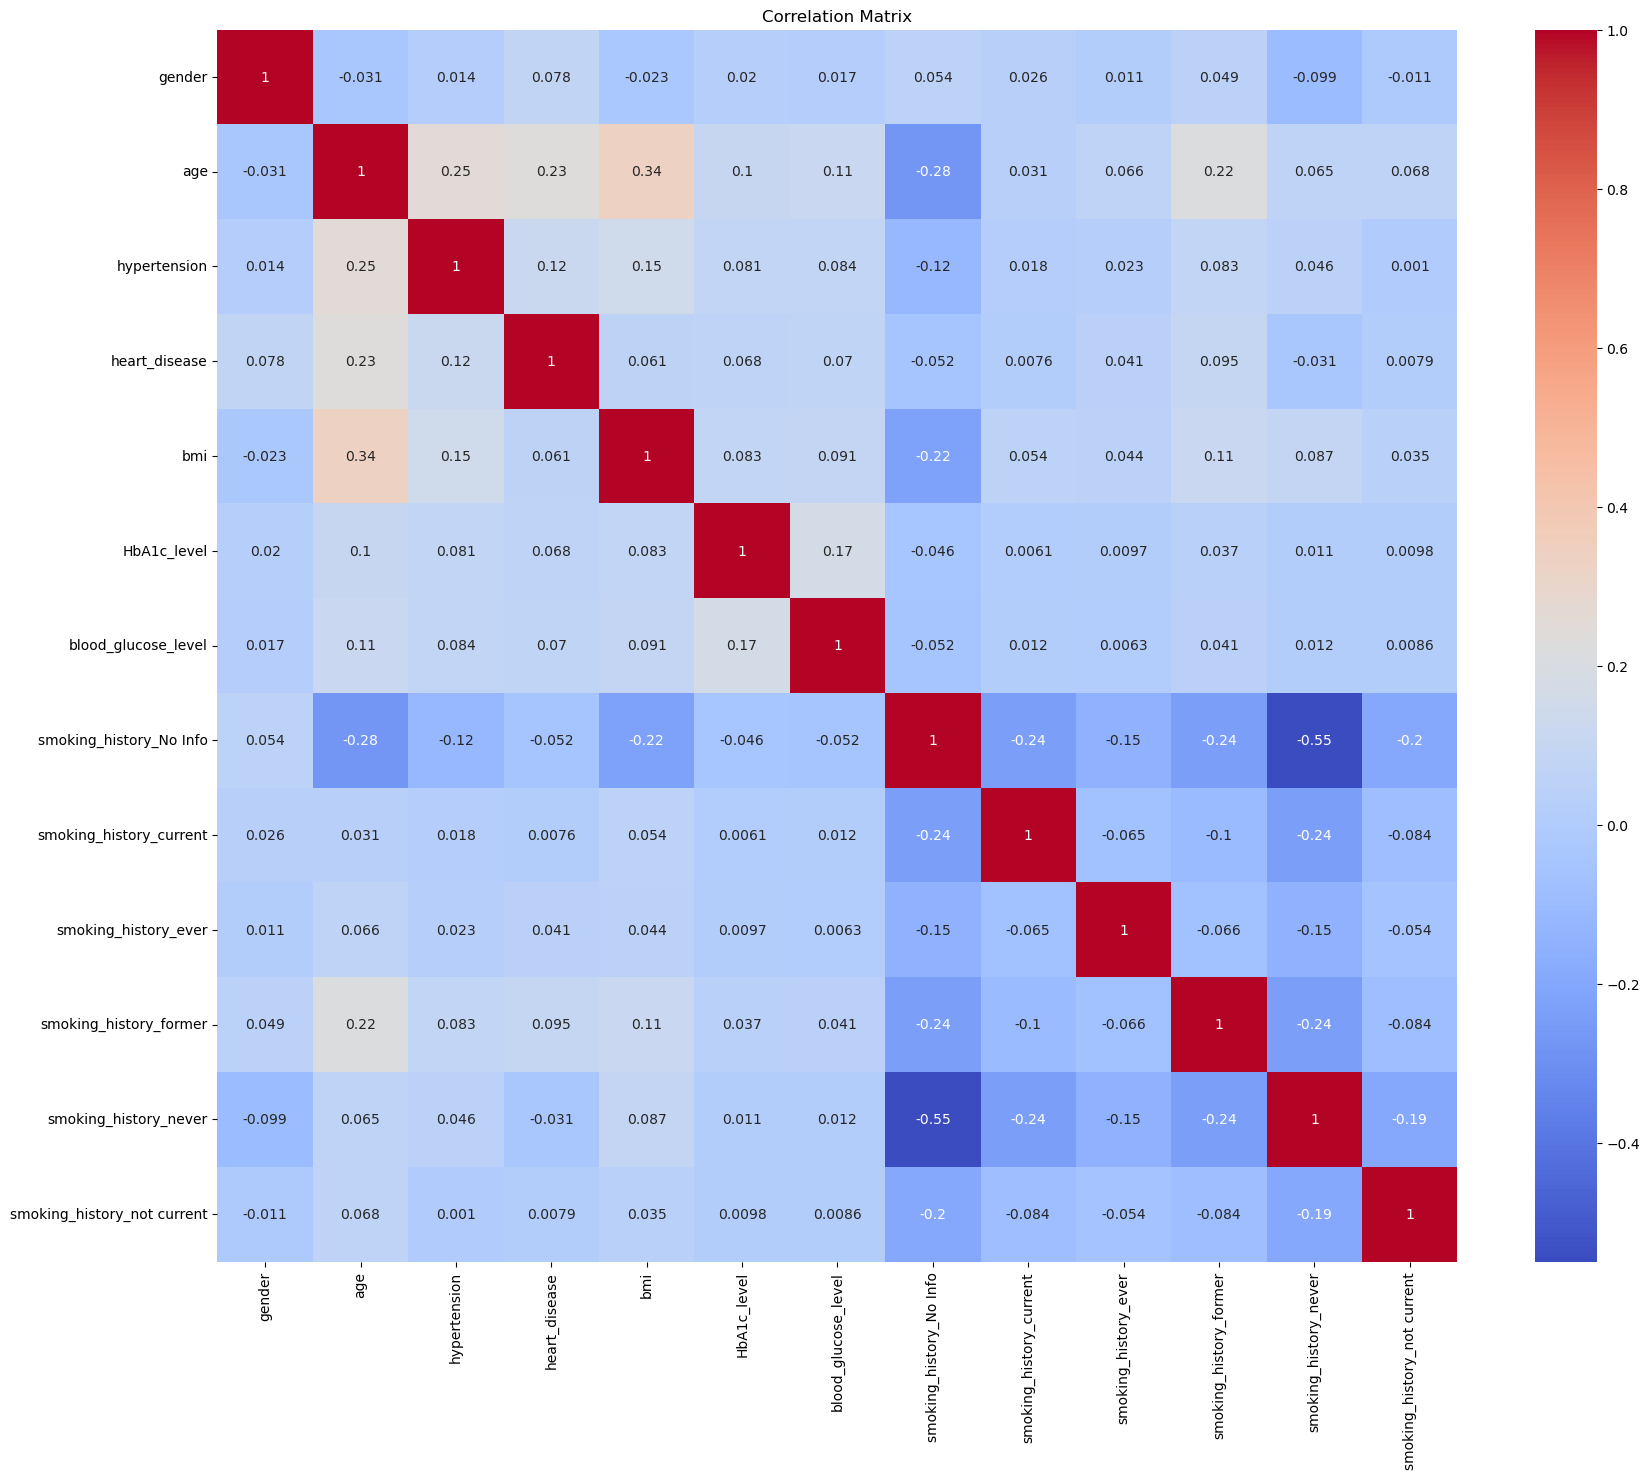

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
# show correlation matrix 

correlation_matrix = X.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

X=np.array(X)
Y=np.array(Y)

X 
Y

In [7]:
# split dataset

x_train , x_test , y_train , y_test = train_test_split(X,Y,train_size=0.80 , random_state=42)

In [8]:
# Logistic Regression 

param_grid = {
    # 'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=42)
grid_search = GridSearchCV(classifier, param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
train_score1 = grid_search.best_score_

print("Best hyperparameters: ", best_params)
print("Logistic Regression Classifier (train score) : ", train_score1)

accuracy1=grid_search.score(x_test, y_test)

print(f"Logistic Regression Classifier (test score) : {accuracy1}")

Best hyperparameters:  {'C': 0.01}

Logistic Regression Classifier (train score) :  0.9606875

Logistic Regression Classifier (test score) : 0.9591


Logistic Regression Classifier (confusion matrix) :



[[18160   132]

 [  686  1022]]


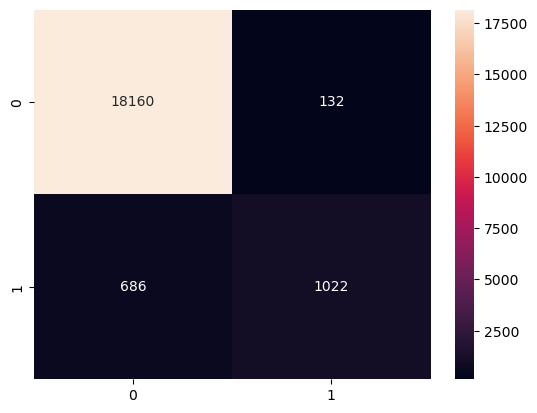

In [9]:
y_pred=grid_search.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print("Logistic Regression Classifier (confusion matrix) :\n")
print(cm)

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [10]:
# DT

from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_leaf_nodes':[5,8,10],
}

grid_search = GridSearchCV(dt, param_grid, cv=5)

grid_search.fit(x_train,y_train)

train_score2 = grid_search.best_score_

print("Best parameters:", grid_search.best_params_)

print("Decision Tree Classifier (train score) : ", train_score2)


accuracy2=grid_search.score(x_test, y_test)


print("Decision Tree Classifier (test score) : ", accuracy2)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Classifier (train score) :  0.9718

Decision Tree Classifier (test score) :  0.97215


Decision Tree Classifier (confusion matrix) :



[[18292     0]

 [  557  1151]]


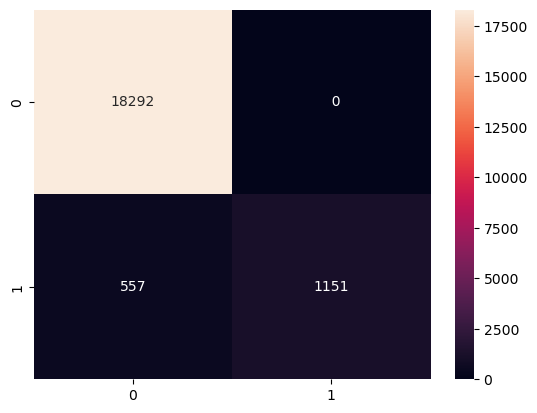

In [11]:
y_pred=grid_search.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier (confusion matrix) :\n")
print(cm)

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [12]:
# SVM

from sklearn.svm import SVC

classifier = SVC(kernel='rbf', C=1, random_state=42)

classifier = classifier.fit(x_train, y_train)

train_score3=classifier.score(x_train,y_train)
print("SVM Classifier (train score) : ",train_score3)

accuracy3 = classifier.score(x_test, y_test)

print('SVM Classifier (test score) : ',accuracy3)

SVM Classifier (train score) :  0.966625

SVM Classifier (test score) :  0.965


SVM Classifier (confusion matrix) :



[[18283     9]

 [  691  1017]]


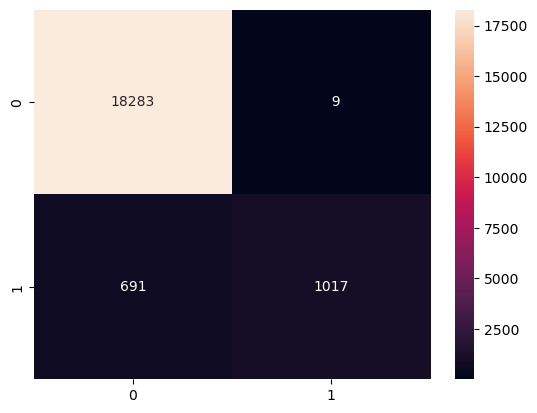

In [13]:
y_pred=classifier.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print("SVM Classifier (confusion matrix) :\n")
print(cm)

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [14]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(max_depth=5,n_estimators=10,max_features=10, random_state=42)

rfc.fit(x_train, y_train)
train_score4=rfc.score(x_train,y_train)
print("Random Forest Classifier (test score) : ",train_score4)
accuracy4 = rfc.score(x_test, y_test)
print("Random Forest Classifier (test score) : ", accuracy4)

Random Forest Classifier (test score) :  0.9718

Random Forest Classifier (test score) :  0.97215


Random Forest Classifier (confusion matrix) :



[[18292     0]

 [  557  1151]]


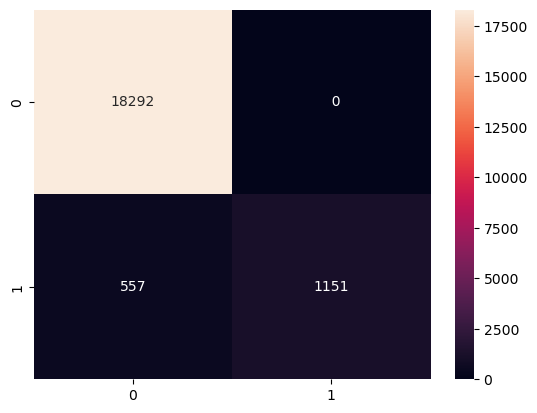

In [15]:
y_pred=rfc.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print("Random Forest Classifier (confusion matrix) :\n")
print(cm)

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [16]:
# KNN 

from sklearn.neighbors import KNeighborsClassifier


classifier = KNeighborsClassifier(n_neighbors = 10 , metric = 'minkowski', p = 2 )
classifier.fit(x_train, y_train)

train_score5=classifier.score(x_train,y_train)
print("KNN Classifier (train score) : ",train_score5)

accuracy5 = accuracy_score(y_test,y_pred)
print("KNN Classifier (test score) : ", accuracy5)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Classifier (train score) :  0.9646375

KNN Classifier (test score) :  0.97215


C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Classifier (confusion matrix) :



[[18263    29]

 [  749   959]]


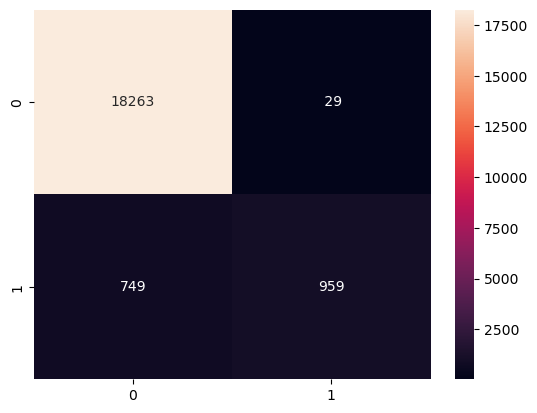

In [17]:
y_pred = classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print("KNN Classifier (confusion matrix) :\n")
print(cm)

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

In [18]:
# Naive Bayes 

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

train_score6=classifier.score(x_train,y_train)
print("Naive Bayes Classifier (train score) : ",train_score6)

accuracy6 = accuracy_score(y_test,y_pred)
print("Naive Bayes Classifier (test score) : ", accuracy6)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Naive Bayes Classifier (train score) :  0.9646375

Naive Bayes Classifier (test score) :  0.9611


Naive Bayes Classifier (confusion matrix) :



[[16959  1333]

 [  593  1115]]


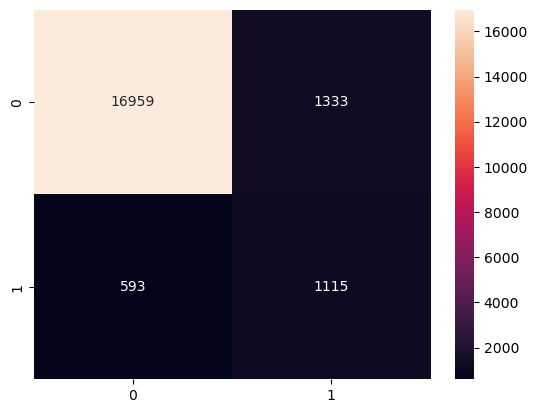

In [19]:
y_pred = nb.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print("Naive Bayes Classifier (confusion matrix) :\n")
print(cm)

sns.heatmap(cm, annot=True,fmt='3g')
plt.show()

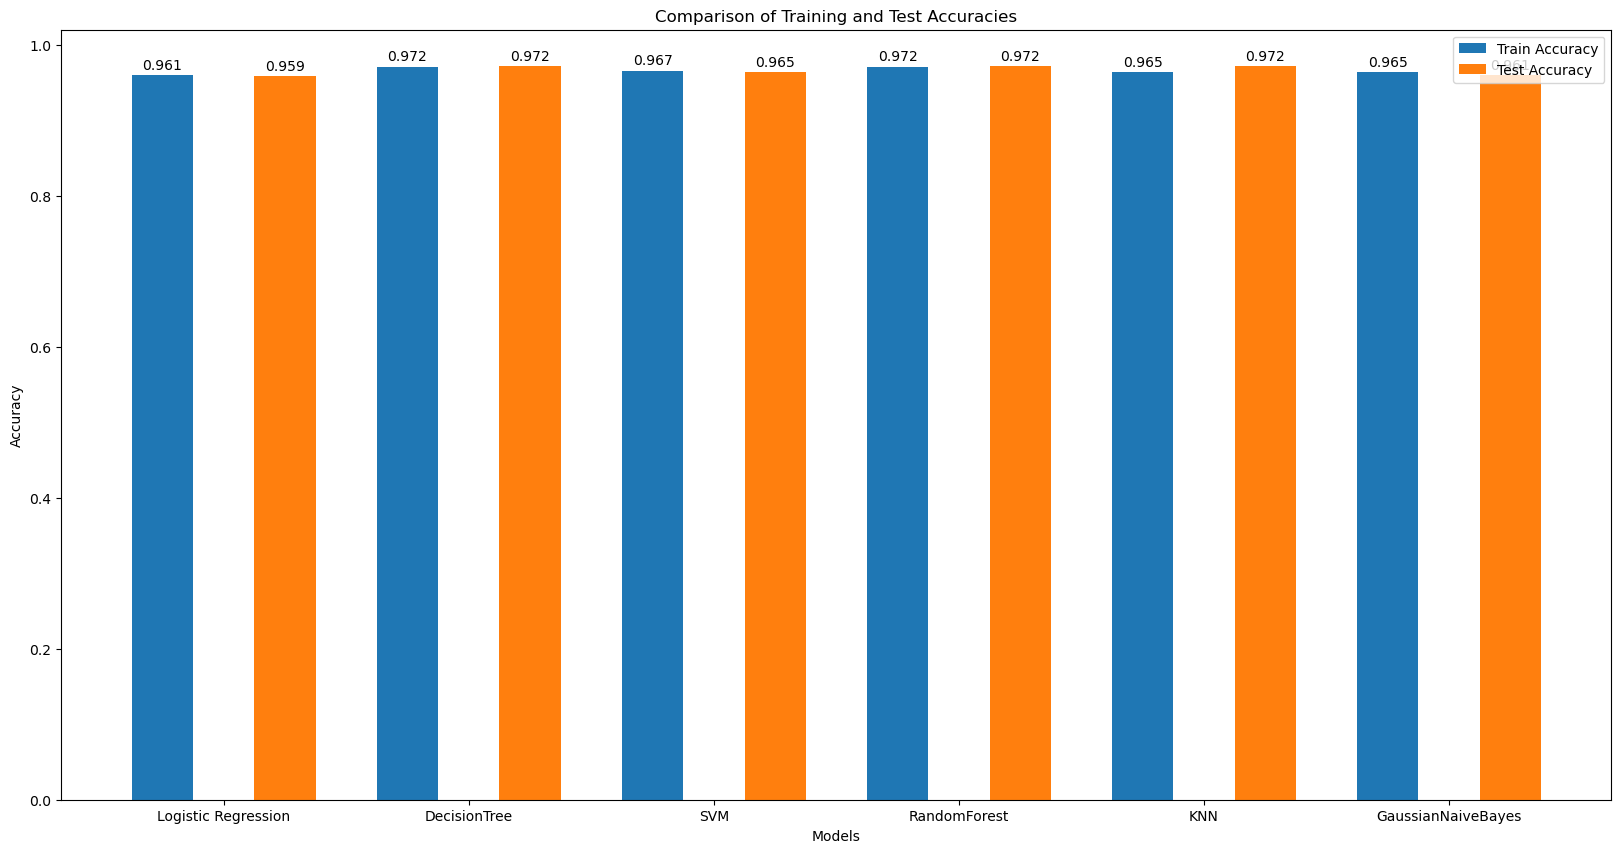

In [20]:
# plot all models 

train_scores=[train_score1,train_score2,train_score3,train_score4,train_score5,train_score6]
test_scores=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]

models = ['Logistic Regression', 'DecisionTree', 'SVM', 'RandomForest', 'KNN', 'GaussianNaiveBayes']

x = np.arange(len(models))

width = 0.25

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width, train_scores, width, label='Train Accuracy')

rects2 = ax.bar(x + width, test_scores, width, label='Test Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Test Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()